<a href="https://colab.research.google.com/github/MarcoIntor/Repositorio-Marco/blob/main/Examen_de_cinturo%CC%81n_AML_%E2%80%93_Opcio%CC%81n_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen de cinturón AML – Opción C


El dataset utilizado es el “Human Activity Recognition with Smartphones Dataset”, que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. **El objetivo** es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

## 1. **Exploración y preprocesamiento de datos:**


  – Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
  – Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

### **1. a) Carga del dataset**

In [ ]:
import pandas as pd

# Cargar los datos de entrenamiento y prueba
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

### **1.b) Exploración inicial de los datos**

In [ ]:
# Mostrar las primeras filas de cada dataset
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

# Ver la cantidad de filas y columnas
print(f"\nDimensiones de train: {train_data.shape}")
print(f"Dimensiones de test: {test_data.shape}")

Train Data:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  

In [ ]:
# Identificamos variables sensoriales

# Mostrar nombres de columnas
print("\nColumnas en el dataset:")
print(train_data.columns)


Columnas en el dataset:
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [ ]:
# Verificar si existe una columna que indique la actividad física
if "Activity" in train_data.columns:
    print("\nColumna objetivo identificada: 'Activity'")
else:
    print("\nNo se encontró una columna objetivo claramente identificable.")


Columna objetivo identificada: 'Activity'


### **1.c) Manejo de valores nulos**

In [ ]:
# Verificar valores nulos
print("\nValores nulos en train:")
print(train_data.isnull().sum().sum())

print("\nValores nulos en test:")
print(test_data.isnull().sum().sum())



Valores nulos en train:
0

Valores nulos en test:
0


In [ ]:
# Identificamos las columnas con valores nulos
columnas_con_nulo = train_data.columns[train_data.isnull().any()]
print(columnas_con_nulo)


Index([], dtype='object')


In [ ]:
# Eliminamos los valores nulos, ya que no representa una proporción significante para el dataset
train_data = train_data.dropna()

# Verificamos que no hayan valores nulos
print("\nValores nulos en train:")
print(train_data.isnull().sum().sum())


Valores nulos en train:
0


### **1.d) Escalar la Data**

In [ ]:
# Estandarización

from sklearn.preprocessing import StandardScaler
# Estandarización

from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas (excluyendo la columna de actividad)
feature_columns = [col for col in train_data.columns if col not in ['Activity', 'subject']]

# Aplicar normalización
scaler = StandardScaler()
train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])
test_data[feature_columns] = scaler.transform(test_data[feature_columns])

scaler = StandardScaler()
train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])
test_data[feature_columns] = scaler.transform(test_data[feature_columns])

## **2. Análisis no supervisado:**


  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.
  – K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
  – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.


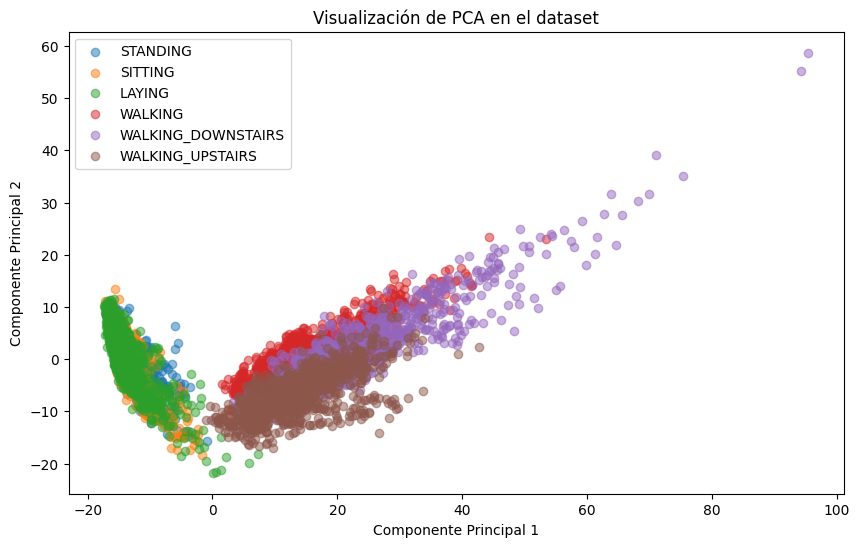

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_data[feature_columns])

# Crear DataFrame con los nuevos componentes
pca_df = pd.DataFrame(train_pca, columns=['PC1', 'PC2'])
pca_df['Activity'] = train_data['Activity']

# Visualización de los datos en el espacio reducido
plt.figure(figsize=(10, 6))
for activity in pca_df['Activity'].unique():
    subset = pca_df[pca_df['Activity'] == activity]
    plt.scatter(subset['PC1'], subset['PC2'], label=activity, alpha=0.5)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de PCA en el dataset")
plt.legend()
plt.show()

## **3. Modelado con MLP:**


### **3. a) Etiquetas a valores numéricos**

  – Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable objetivo
encoder = LabelEncoder()
train_data['Activity'] = encoder.fit_transform(train_data['Activity'])
test_data['Activity'] = encoder.transform(test_data['Activity'])

# Verificar clases codificadas
print("Clases codificadas:", encoder.classes_)

Clases codificadas: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


### **3. b) Separar la data**

  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.


In [ ]:
from sklearn.model_selection import train_test_split

X_train = train_data[feature_columns]
y_train = train_data["Activity"]
X_test = test_data[feature_columns]
y_test = test_data["Activity"]

# División interna (por si se desea un conjunto de validación)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Tamaño de train: {X_train.shape}")
print(f"Tamaño de validación: {X_val.shape}")
print(f"Tamaño de test: {X_test.shape}")

Tamaño de train: (5881, 561)
Tamaño de validación: (1471, 561)
Tamaño de test: (2947, 561)


### **3.c) Construir modelo MLP**

  – Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Definir el modelo
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          71,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,582 (314.77 KB)

 Trainable params: 80,582 (314.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32, verbose=1)

Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7952 - loss: 0.5073 - val_accuracy: 0.9660 - val_loss: 0.1126
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9671 - loss: 0.0856 - val_accuracy: 0.9694 - val_loss: 0.0896
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9765 - loss: 0.0606 - val_accuracy: 0.9742 - val_loss: 0.0745
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9810 - loss: 0.0509 - val_accuracy: 0.9728 - val_loss: 0.0776
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9836 - loss: 0.0462 - val_accuracy: 0.9742 - val_loss: 0.0736
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9786 - loss: 0.0557 - val_accuracy: 0.9803 - val_loss: 0.0581
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0464 - val_accuracy: 0.9721 - val_loss: 0.0663
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9891 - loss: 0.0333 - val_accuracy: 0.

## **4. Evaluación del modelo:**


  * Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión.
  * Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.95      0.90      0.93       491
           2       0.89      0.96      0.92       532
           3       0.93      0.97      0.95       496
           4       0.98      0.91      0.94       420
           5       0.92      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



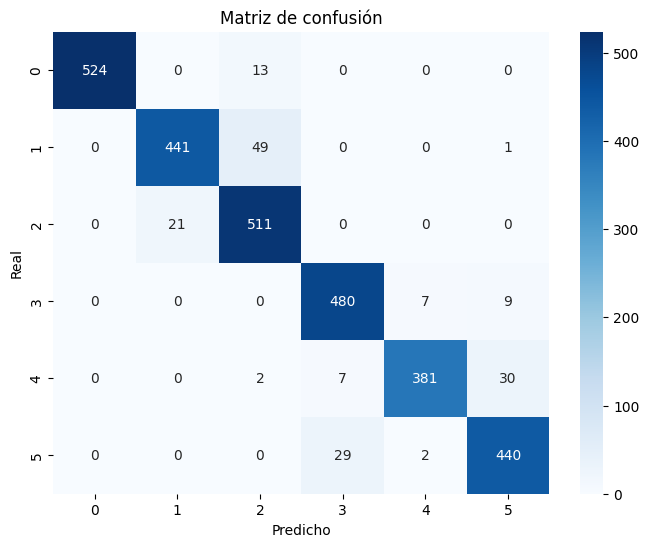

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicciones en test
y_pred = model.predict(X_test).argmax(axis=1)

# Reporte de métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


  – Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.



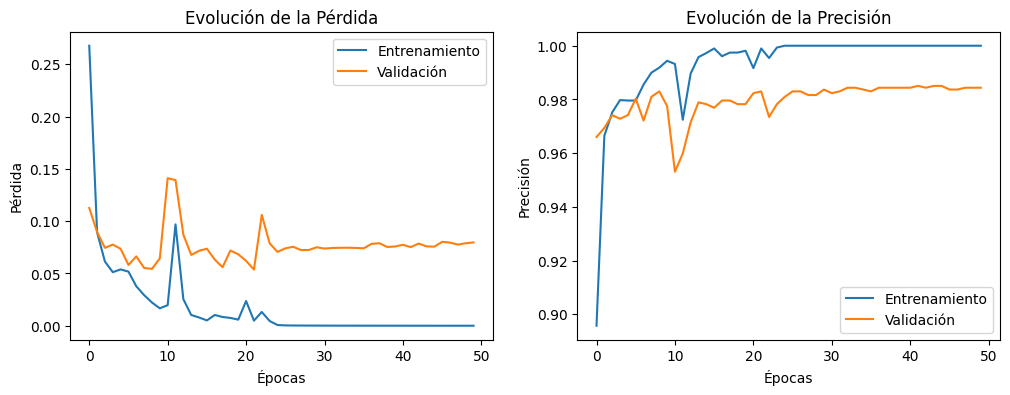

In [ ]:
plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión')
plt.legend()

plt.show()

## 5. Discusión y análisis:


  – Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?


El PCA (Análisis de Componentes Principales) ayudó a reducir la dimensionalidad de los datos, lo que permitió visualizar cómo las diferentes actividades se agrupan en un espacio de menor dimensión.

In [ ]:
# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


Varianza explicada por cada componente:
[0.50781172 0.0658068 ]


In [ ]:
# Obtener los pesos de cada característica en cada componente principal
pca_components = pd.DataFrame(pca.components_, columns=feature_columns)  # Reemplaza feature_names con los nombres de tus columnas

# Mostrar los pesos de los primeros componentes
print("Pesos de las características en los primeros componentes:")
print(pca_components.head())

# Tomar el primer componente y ver qué características tienen más peso absoluto
important_features = pca_components.iloc[0].abs().sort_values(ascending=False)
print("\nCaracterísticas más importantes para el primer componente:")
print(important_features)

Pesos de las características en los primeros componentes:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.000028          -0.002473          -0.001527          0.056213   
1           0.015638          -0.000080          -0.004052         -0.011165   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0          0.056788          0.054363          0.055969          0.056264   
1         -0.025959         -0.031240         -0.009835         -0.028635   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0          0.053886          0.055892  ...                        -0.005451   
1         -0.035351         -0.010926  ...                         0.068717   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                         0.012324                         0.010199   
1                        -0.016957                        -0.012832   

   angle(tBodyAcc

  – Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?



- Ventajas:
  - Alta precisión (94%), lo que sugiere que el modelo es bueno para predecir actividades físicas.
  - Buen balance entre precisión y recall en general.
- Desventajas:
  - Posible sobreajuste, ya que la precisión en entrenamiento es muy alta. (ver en el gráfico)
  - Algunas clases tienen menor recall, lo que indica que el modelo tiene más dificultades para identificar ciertos tipos de actividad.
- Mejoras posibles:
  - Regularización (Dropout, L2): Para reducir el sobreajuste.